## Importing the libraries.

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

## Loading of the datasets.

In [5]:
data = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\KNN\Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## To plot histgraph and boxgraph to understand data in a visuvalization.

<Axes: ylabel='Count'>

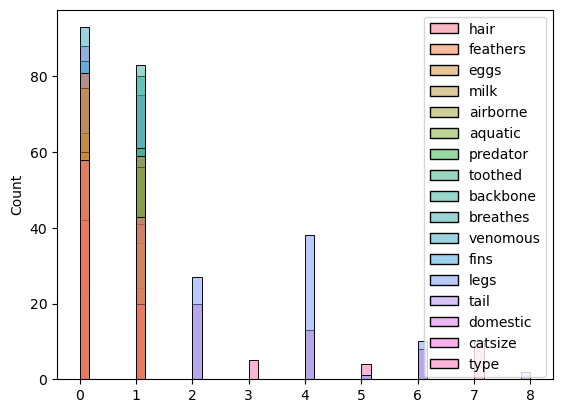

In [7]:
Hist_plot = sns.histplot(data)
Hist_plot 

<Axes: >

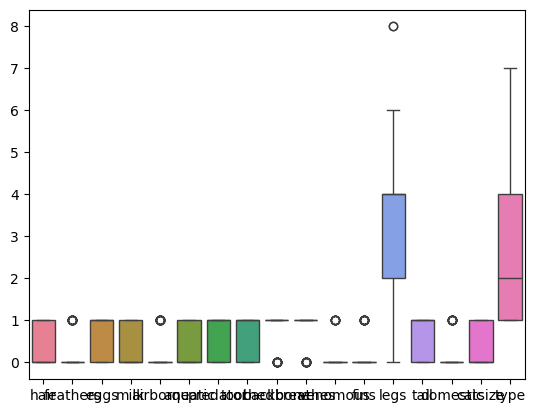

In [8]:
box_plot = sns.boxplot(data)
box_plot 

## To check data has null values are not.

In [10]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

### --> To observed above data there is no null values.

## To check data has outliers are not.

In [13]:
Q1 = data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']].quantile(0.25)
Q3 = data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']].quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR)

hair        0.0
feathers    0.0
eggs        0.0
milk        0.0
airborne    0.0
aquatic     0.0
predator    0.0
toothed     0.0
backbone    1.0
venomous    0.0
fins        0.0
legs        2.0
tail        0.0
domestic    0.0
catsize     0.0
type        1.0
Name: 0.25, dtype: float64 hair        1.0
feathers    0.0
eggs        1.0
milk        1.0
airborne    0.0
aquatic     1.0
predator    1.0
toothed     1.0
backbone    1.0
venomous    0.0
fins        0.0
legs        4.0
tail        1.0
domestic    0.0
catsize     1.0
type        4.0
Name: 0.75, dtype: float64 hair        1.0
feathers    0.0
eggs        1.0
milk        1.0
airborne    0.0
aquatic     1.0
predator    1.0
toothed     1.0
backbone    0.0
venomous    0.0
fins        0.0
legs        2.0
tail        1.0
domestic    0.0
catsize     1.0
type        3.0
dtype: float64


In [14]:
Lower_Extreame = Q1-1.5*IQR
Upper_Extreame = Q3+1.5*IQR
print(Lower_Extreame,Upper_Extreame)

hair       -1.5
feathers    0.0
eggs       -1.5
milk       -1.5
airborne    0.0
aquatic    -1.5
predator   -1.5
toothed    -1.5
backbone    1.0
venomous    0.0
fins        0.0
legs       -1.0
tail       -1.5
domestic    0.0
catsize    -1.5
type       -3.5
dtype: float64 hair        2.5
feathers    0.0
eggs        2.5
milk        2.5
airborne    0.0
aquatic     2.5
predator    2.5
toothed     2.5
backbone    1.0
venomous    0.0
fins        0.0
legs        7.0
tail        2.5
domestic    0.0
catsize     2.5
type        8.5
dtype: float64


In [15]:
outliers =data[(data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']]>Upper_Extreame)&(data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']]<Lower_Extreame)]
outliers

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### --> To observed above data there is no outliers in the data.

In [17]:
df = data.drop(columns='animal name')

## Saperation of features and target.

In [19]:
features = df.drop(columns='type')
target = df[['type']]

## Split the dataset into training and testing sets 

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,train_size=0.8,random_state=10)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 16)
(21, 16)
(80, 1)
(21, 1)


In [23]:
Y_train

,type
91,3
71,2
53,7
48,1
45,1
...,...
89,5
28,1
64,1
15,7


In [24]:
KNN = KNeighborsClassifier(n_neighbors=1)

## To find best K-value by using Gridsearch.

In [26]:
Params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

In [27]:
grid_search = GridSearchCV(KNN,Params)

In [28]:
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [29]:
grid_search.best_params_

{'n_neighbors': 1}

### --> To observed above output the gridsearch giving the k-value is '1'.

## To find accuracy_score with the help of KNN algorithem.

In [32]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
Y_pre = KNN.predict(X_train)
Y_pre

array([3, 2, 7, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 3, 1,
       2, 1, 2, 1, 5, 7, 1, 4, 1, 4, 6, 1, 7, 2, 6, 1, 6, 2, 2, 2, 2, 1,
       4, 1, 1, 2, 1, 1, 4, 4, 6, 3, 5, 7, 1, 7, 4, 6, 1, 2, 7, 2, 3, 1,
       2, 2, 1, 6, 1, 4, 4, 1, 1, 5, 1, 1, 7, 1], dtype=int64)

In [34]:
accuracy_score(Y_train,Y_pre)

1.0

### --> To observed the output we got 100% accuracy from this we conclude our model is working 100%.

In [36]:
print(classification_report(Y_train,Y_pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### --> The above output tells about the precision,recall,f1-score and accuracy.